In [2]:
import os
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sb
import json
import platform

from eye_tracker_dataset import EyeTrackerDataset
import sys

sys.path.append("..")
from eye_tracker_auto_labeller.scripts import mediapipe_visualizer


SYSTEM_NAME = platform.system()
if SYSTEM_NAME == "Windows" :
    DATA_ROOT_PATH = "D:/data"
if SYSTEM_NAME == "Darwin" :
    DATA_ROOT_PATH = "../eye_tracker_auto_labeller/data/"


def torch_to_numpy(torch_img) :
    return (torch_img.permute([1, 2, 0]).numpy() * 255).astype(np.uint8)

eye_tracker_dataset = EyeTrackerDataset(data_root_path=DATA_ROOT_PATH, return_landmark=False)
eye_tracker_dataset_with_landmark = EyeTrackerDataset(data_root_path=DATA_ROOT_PATH)
eye_tracker_dataset_full = EyeTrackerDataset(data_root_path=DATA_ROOT_PATH, return_image =True)

two_D_visualizer = mediapipe_visualizer.TwoDimensionVisualizer()

print(len(eye_tracker_dataset))

9513


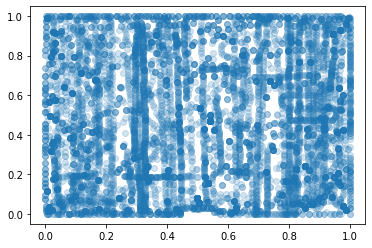

In [5]:
plt.scatter(
    x = list(map(lambda x : x["mouse_position"][0], eye_tracker_dataset)),
    y = list(map(lambda x : x["mouse_position"][1], eye_tracker_dataset)),
    alpha=0.2
)
plt.show()

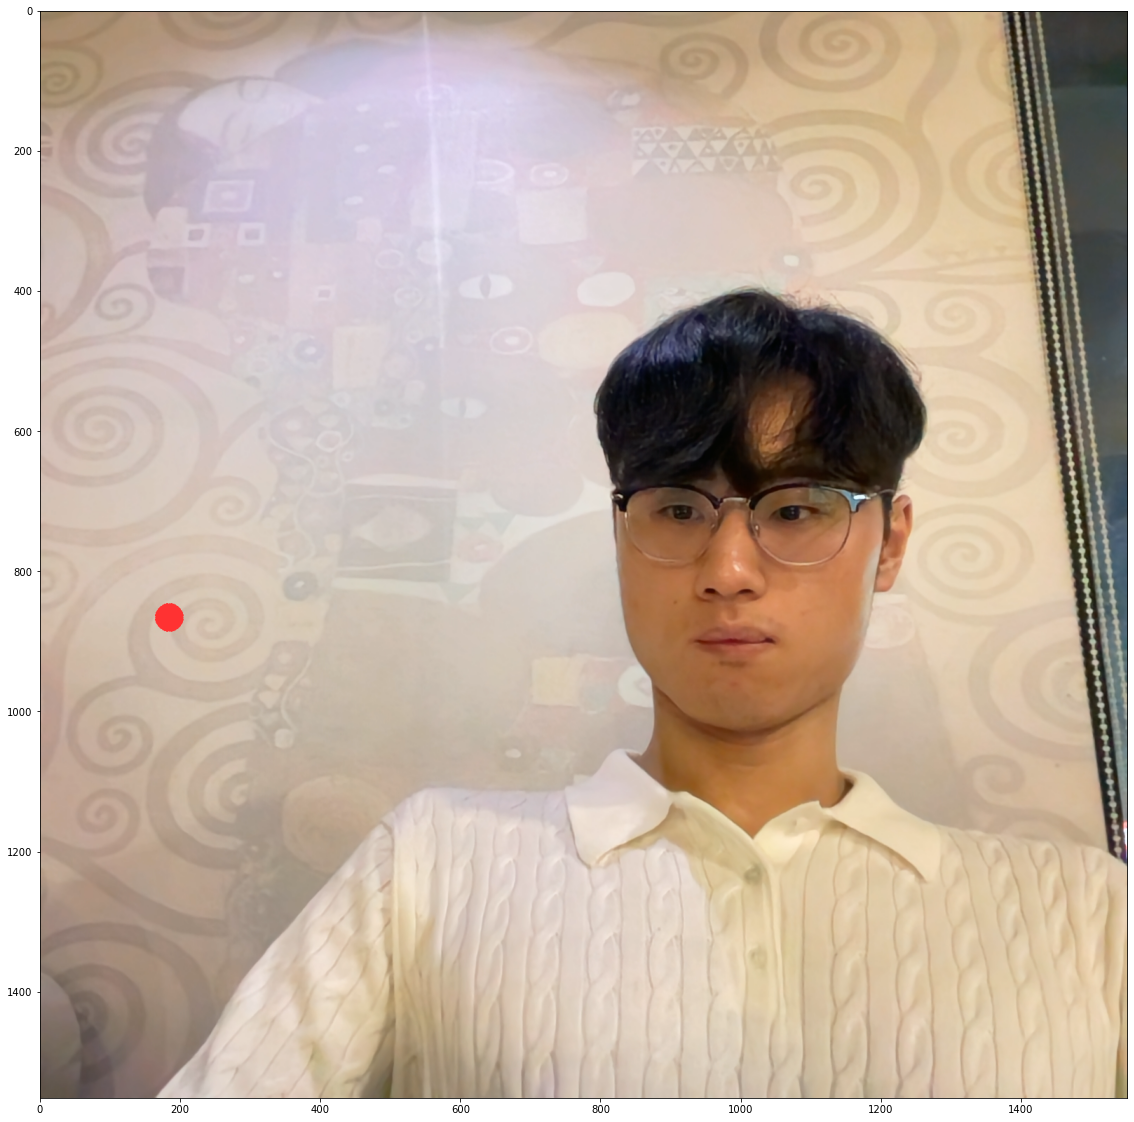

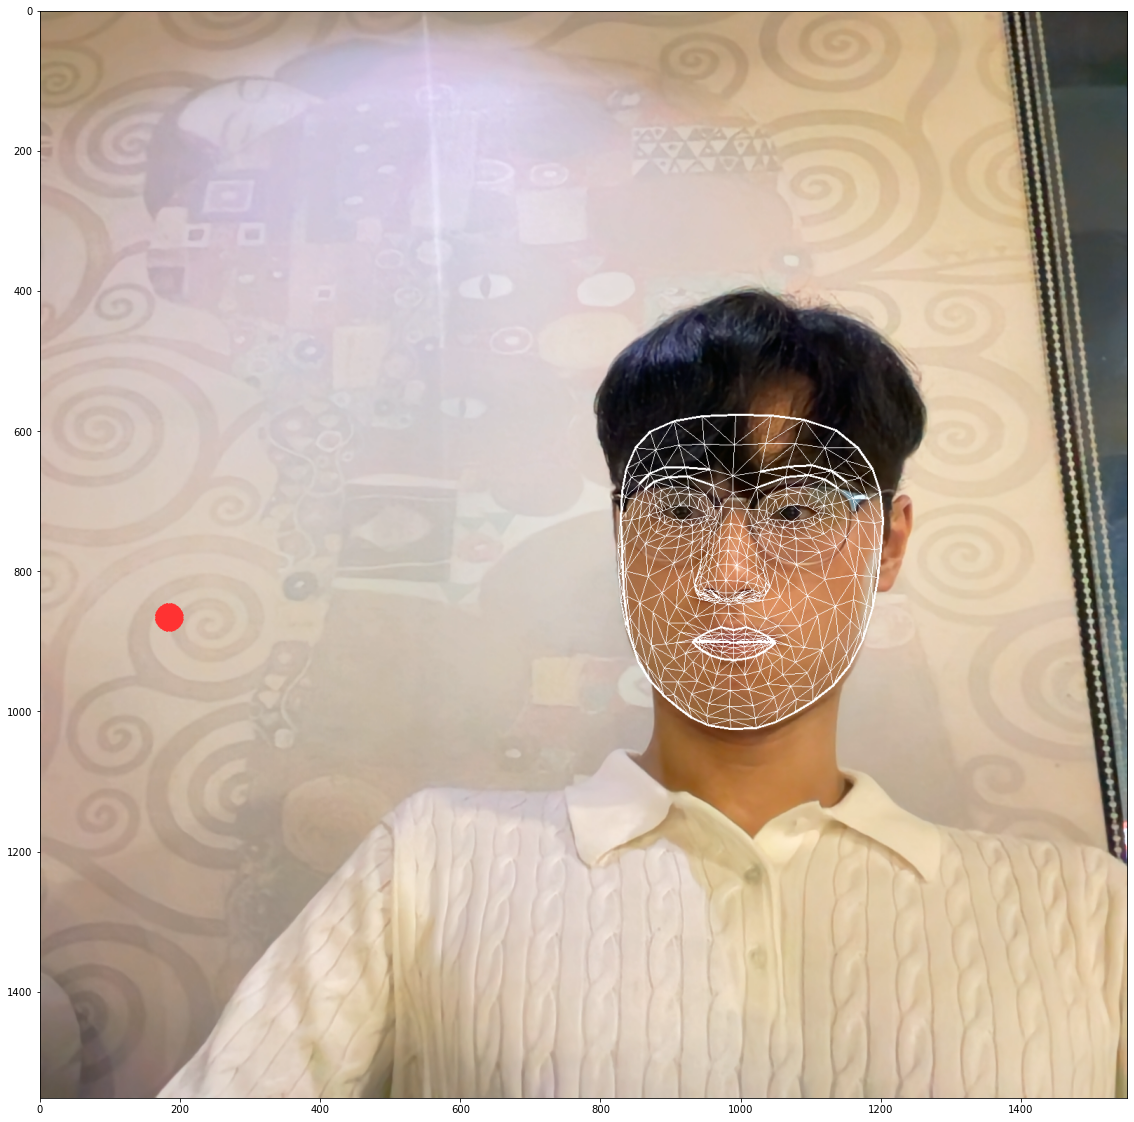

In [6]:
IDX = 9100

data = eye_tracker_dataset_full[IDX]

face_landmark_array = data["face_landmark_array"].numpy()
full_image = torch_to_numpy(data["image"])
image_shape = np.array([full_image.shape[1], full_image.shape[0]])
mouse_position_raw = data["mouse_position"].numpy()
mouse_position = (mouse_position_raw * image_shape).astype(int)

vis_image = full_image.copy()
cv2.circle(
    vis_image,
    tuple(mouse_position),
    10,
    (255, 50, 50),
    20
)

plt.figure(figsize=(20, 20))
plt.imshow(vis_image)
plt.show()

two_D_visualizer.visualizeFace2D(
    vis_image,
    face_landmark_array
)

plt.figure(figsize=(20, 20))
plt.imshow(vis_image)
plt.show()


